# Extract MILC output with python script
Sept 14, 2023

## Description of columns in parse script : 



- Solve time =  2 x sum of all mass-solve times


- quda-total-time = solve-time + mg-setup + epsilon

- summed_time = quda_total_time + contractions + epsilon

- milc_total_time = summed_time + err

In [1]:
! hostname

jupyter-venkitesh


In [2]:
import os, glob
import subprocess as sp
import numpy as np
import shutil

import re

import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets import *

import itertools

In [3]:
from python_parse import *

In [4]:
%matplotlib widget

In [5]:
top_dir='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_frontier/runs_jan27_2023'

runs_lst=[
['cg_frontier_144_split_10_light','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-cg_10split.kpp'],

['mg_frontier_144_10split_2','mg','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-full_mg_10light.kpp'],

['mg_frontier_144_10split_2','mg','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-full_mg_10light_2.kpp'],
    
# ['cg_frontier_144_split_6_light','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/6_split_mass/output-cg_6split.kpp'],
]



In [6]:
## Parse output files

df_data=pd.DataFrame([])

op_files=[]
for count,i in enumerate(runs_lst):
#     op_file='op%s.out'%(count)
#     run_type='cg' if count<3 else 'mg'   ## Assume first few runs are cg, rest mg ##!
#     print(fl,run_type)
#     cmd='./parse.sh %s %s > %s'%(fl,run_type,op_file)
#     op=sp.check_output(cmd,shell=True,text=True)
    
#     ## Run bash script to parse output
#     # cmd=['./parse.sh',fl,run_type,' > op%s.out'%(count+1)]
#     # op=sp.run(cmd,check=True,capture_output=True,text=True)
    
#     print(cmd)
#     print(op)
#     ## Append output file names to list
#     op_files.append(op_file)
    
    
    # print(run_type,fname)
    print(i)
    dict1 = f_extract(fname=i[2],run_type=i[1],m_light=10)
    dict1['name']=i[0]
    
    # f_print_dict(dict1)
    
    df_data=pd.concat([df_data,pd.DataFrame(dict1,index=[count])])
    count+=1

cols=['name', 'startup', 'loading', 'mg-setup',
       'make/save-src', 'mass-01', 'mass-02', 'mass-03', 'mass-01-10',
       'mass-11-20', 'solve-time','contractions', 'quda-total-time','summed-time', 'error',
       'milc-total-time']

# df_data=df_data[cols].copy()
    
    

['cg_frontier_144_split_10_light', 'cg_split', '/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-cg_10split.kpp']
120
['mg_frontier_144_10split_2', 'mg', '/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-full_mg_10light.kpp']
['mg_frontier_144_10split_2', 'mg', '/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/output-full_mg_10light_2.kpp']


In [7]:
df_data

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.00,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_frontier_144_split_10_light
1,30.66426,629.6856,2136.59,28.614217,21.154911,21.057078,24.899024,34.496870,48.983990,68.875325,...,68.248357,651.128496,22.67341,85.51551,3585.718,4360.870,1438.753708,4343.882488,16.987512,mg_frontier_144_10split_2
2,29.85888,643.8882,2229.79,26.444628,19.213769,21.556784,26.775707,34.966525,49.852900,69.753320,...,66.466271,656.224023,22.69951,85.28067,3683.316,4472.511,1445.380589,4456.897850,15.613151,mg_frontier_144_10split_2


In [8]:
df_data.head(4)

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.00,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_frontier_144_split_10_light
1,30.66426,629.6856,2136.59,28.614217,21.154911,21.057078,24.899024,34.496870,48.983990,68.875325,...,68.248357,651.128496,22.67341,85.51551,3585.718,4360.870,1438.753708,4343.882488,16.987512,mg_frontier_144_10split_2
2,29.85888,643.8882,2229.79,26.444628,19.213769,21.556784,26.775707,34.966525,49.852900,69.753320,...,66.466271,656.224023,22.69951,85.28067,3683.316,4472.511,1445.380589,4456.897850,15.613151,mg_frontier_144_10split_2


In [9]:
# df_data.iloc[[3,10,11]]
# df_data.iloc[[2,5,7,8,9]]
# df_data.iloc[[3,8,11]]
df=df_data.iloc[[0,1,2]]
df

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.00,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_frontier_144_split_10_light
1,30.66426,629.6856,2136.59,28.614217,21.154911,21.057078,24.899024,34.496870,48.983990,68.875325,...,68.248357,651.128496,22.67341,85.51551,3585.718,4360.870,1438.753708,4343.882488,16.987512,mg_frontier_144_10split_2
2,29.85888,643.8882,2229.79,26.444628,19.213769,21.556784,26.775707,34.966525,49.852900,69.753320,...,66.466271,656.224023,22.69951,85.28067,3683.316,4472.511,1445.380589,4456.897850,15.613151,mg_frontier_144_10split_2


In [10]:
masses = [0.000569, 0.0010, 0.001555, 0.00225, 0.00311, 0.004665, 0.00622, 0.00933, 0.01244, 0.01555]

In [11]:
# mass values for 6 light mass test ( very low values to start) 
# masses = [0.00005, 0.0001, 0.0002, 0.0005, 0.0008, 0.001]

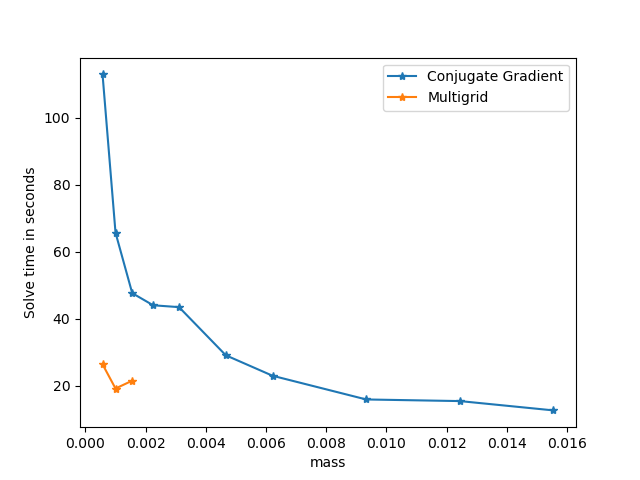

In [12]:
m_light=10
light_mass_columns=['mass-{:02d}'.format(count) for count in range(m_light)] # keys for all light masses

plt.figure()


y = df.iloc[0][light_mass_columns].values
x=masses[:m_light]
plt.plot(x,y,marker='*', label='Conjugate Gradient')

x=masses[:3]
y = df.iloc[2][light_mass_columns].values[:3]
plt.plot(x,y,marker='*', label='Multigrid')

plt.ylabel("Solve time in seconds")
plt.xlabel("mass")
plt.legend(loc='best')
# plt.yscale('log')

plt.show()

In [13]:
sub_list=['name']+light_mass_columns
sub_list
df[sub_list]

,name,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,mass-07,mass-08,mass-09
0,cg_frontier_144_split_10_light,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,15.945133,15.462891,12.680299
1,mg_frontier_144_10split_2,28.614217,21.154911,21.057078,24.899024,34.496870,48.983990,68.875325,92.745335,142.937670,167.364075
2,mg_frontier_144_10split_2,26.444628,19.213769,21.556784,26.775707,34.966525,49.852900,69.753320,94.938480,142.148995,170.572915


In [ ]:
# sub_list=['name','mg-setup','solve-time','milc-total-time']
# df[sub_list]

## Plots

,name,summed-time
0,cg_frontier_144_split_10_light,1800.332647
1,mg_frontier_144_split,4343.882488


['cg_frontier_144_split_10_light' 'mg_frontier_144_split'] [1800.3326475 4343.8824878]


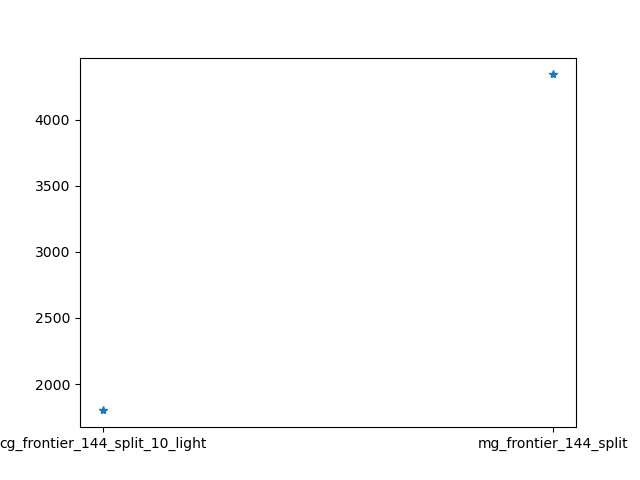

In [16]:
y_options=['mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-11-20',
       'startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error', 'mass-01-10']


def f_compare_plot(df,y,x='name'):
    # df.plot(x=x,y=y,kind='line',marker='D')
    
    display(df[[x,y]])
    
    x=df.name.values
    y=df[y].values
    print(x,y)
    plt.figure()
    plt.plot(x,y,marker='*',linestyle='')
    # plt.plot(y,marker='*')
    # plt.legend()
    plt.show()
    
df=df_data.copy()
# df.plot(x='name',y='summed-time',kind='line',marker='*')
f_compare_plot(df,'summed-time','name')

In [ ]:
interact(f_compare_plot,df=fixed(df),y=y_options,x=fixed('name'))

In [ ]:
def f_plot_together(df,labels_lst,markers_lst): 
    plt.figure()
    x=df.name.values

    for label,marker in zip(labels_lst,markers_lst):
        y=df[label].values
        plt.plot(x,y,marker=marker,label=label)

    plt.legend()


In [ ]:
markers=['*','D','H','x','d','p','1','2','h','v']
labels=['startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error']

labels1=['mg-setup', 'solve-time','summed-time', 'quda-total-time', 'milc-total-time']

labels2=['startup', 'loading','contractions','make/save-src','error']

f_plot_together(df,labels1,markers)
f_plot_together(df,labels2,markers)
